This notebooks is a playground to work with SRO dataset. Nothing fancy here, just a place to try out some ideas.

35.0


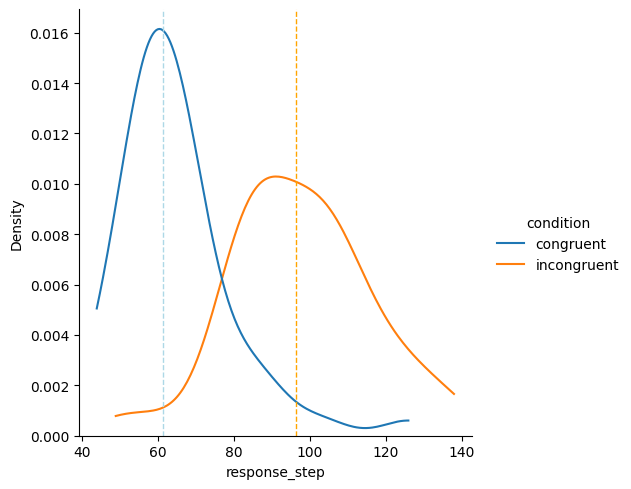

In [9]:
%reload_ext autoreload
%autoreload 3

from src.cogponder.datasets import StroopSRODataset, CogPonderDataModule
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# datamodule = CogPonderDataModule(StroopSRODataset(100))

dataset = StroopSRODataset(response_step_interval=10)

X, conditions, is_corrects, responses, response_steps = dataset[202]

plot_data = pd.DataFrame({
    'condition': conditions,
    'response_step': response_steps,
})

# conditions: 0 = incongruent, 1 = congruent
plot_data['condition'] = plot_data['condition'].map({0: 'incongruent', 1: 'congruent'})

rt_medians = plot_data.groupby('condition').median()
stroop_effect = rt_medians['response_step'].diff()[1]

print(stroop_effect)
sns.displot(plot_data,
            x='response_step', hue='condition',
            kind='kde', cut=0)

plt.axvline(rt_medians.loc['congruent'].item(), color='lightblue', lw=1, ls='--')
plt.axvline(rt_medians.loc['incongruent'].item(), color='orange', lw=1, ls='--')

plt.show()

In [8]:
data = pd.read_csv('data/Self_Regulation_Ontology/adaptive_n_back.csv.gz', index_col=0)
data = data.query('worker_id == worker_id.unique()[-1] and exp_stage == "adaptive"')

data_s521_2back = data.query('load == 2').sort_values(['block_num', 'trial_num'])
data_s521_2back

,battery_name,block_num,correct,correct_response,exp_stage,experiment_exp_id,finishtime,focus_shifts,full_screen,key_press,...,possible_responses,rt,stim,stimulus,target,time_elapsed,trial_id,trial_num,trial_type,worker_id
adaptive_n_back_s521_0067,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",392.0,g,"<div class = ""centerbox""><div class = ""center-...",NaN,265160,stim,40.0,poldrack-single-stim,s560
adaptive_n_back_s521_0069,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",549.0,D,"<div class = ""centerbox""><div class = ""center-...",NaN,267178,stim,41.0,poldrack-single-stim,s560
adaptive_n_back_s521_0071,Self Regulation Battery,0.0,1.0,37,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,37.0,...,"[37, 40]",854.0,g,"<div class = ""centerbox""><div class = ""center-...",g,269188,stim,42.0,poldrack-single-stim,s560
adaptive_n_back_s521_0073,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",834.0,b,"<div class = ""centerbox""><div class = ""center-...",D,271199,stim,43.0,poldrack-single-stim,s560
adaptive_n_back_s521_0075,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",956.0,b,"<div class = ""centerbox""><div class = ""center-...",g,273211,stim,44.0,poldrack-single-stim,s560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adaptive_n_back_s521_0855,Self Regulation Battery,16.0,1.0,37,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,37.0,...,"[37, 40]",1081.0,d,"<div class = ""centerbox""><div class = ""center-...",d,1142508,stim,418.0,poldrack-single-stim,s560
adaptive_n_back_s521_0857,Self Regulation Battery,16.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",655.0,d,"<div class = ""centerbox""><div class = ""center-...",G,1144533,stim,419.0,poldrack-single-stim,s560
adaptive_n_back_s521_0859,Self Regulation Battery,16.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",1034.0,g,"<div class = ""centerbox""><div class = ""center-...",d,1146581,stim,420.0,poldrack-single-stim,s560
adaptive_n_back_s521_0861,Self Regulation Battery,16.0,1.0,37,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,37.0,...,"[37, 40]",1217.0,d,"<div class = ""centerbox""><div class = ""center-...",d,1148624,stim,421.0,poldrack-single-stim,s560


In [ ]:
stimuli = data_s521_2back.stim.str.upper()
rt = data_s521_2back.rt.values
responses = data_s521_2back.key_press
is_corrects = data_s521_2back.correct
targets = data_s521_2back.target
# sns.kdeplot(rt)
is_corrects